In [1]:
## BITCOIN PRICE FORECASTING

In [2]:
## ABSTRACT

In [3]:
## DATA SET
## https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset/data

### GROUP: 18
### SOHAM SHAH 002837154
### ABHISHEK MATHUKIYA 002839155

In [4]:
import opendatasets as od
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import scipy 
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [5]:
download_url = 'https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset/data'

od.download(download_url)

Skipping, found downloaded files in "./bitcoin-price-dataset" (use force=True to force download)


In [6]:
df= pd.read_csv('bitcoin_2017_to_2023.csv')
df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611
...,...,...,...,...,...,...,...,...,...,...
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [8]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [9]:
#Checking for any missing Data
df.isna().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [10]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 2072


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
305601,2023-01-01 06:39:00,16540.57,16542.47,16540.02,16541.27,49.840250,8.244146e+05,1884,25.676880,424728.875921
305603,2023-01-01 06:38:00,16540.22,16541.75,16540.17,16540.51,21.572770,3.568366e+05,1120,10.330540,170878.172441
305605,2023-01-01 06:37:00,16540.18,16541.09,16539.09,16540.22,37.271610,6.164794e+05,1342,14.845260,245544.777228
305607,2023-01-01 06:36:00,16538.41,16540.71,16538.41,16540.41,26.427500,4.370955e+05,1180,16.184140,267677.831307
305609,2023-01-01 06:35:00,16540.97,16541.60,16538.41,16538.41,93.228720,1.541990e+06,1499,43.234280,715096.360099
...,...,...,...,...,...,...,...,...,...,...
2929435,2018-01-01 01:04:00,13520.89,13520.89,13481.82,13510.85,9.846013,1.328618e+05,100,6.888381,92965.995157
2929437,2018-01-01 01:03:00,13530.98,13530.98,13486.53,13520.89,5.241386,7.077790e+04,58,3.240286,43765.342085
2929439,2018-01-01 01:02:00,13521.99,13530.98,13481.82,13530.98,4.349511,5.882460e+04,65,1.870174,25303.113683
2929441,2018-01-01 01:01:00,13570.00,13570.00,13521.99,13530.98,3.980699,5.393570e+04,76,0.379774,5145.352856


In [11]:
df.isnull().sum()*100/len(df)

timestamp                       0.0
open                            0.0
high                            0.0
low                             0.0
close                           0.0
volume                          0.0
quote_asset_volume              0.0
number_of_trades                0.0
taker_buy_base_asset_volume     0.0
taker_buy_quote_asset_volume    0.0
dtype: float64

In [12]:
# Checking if all columns of duplicate rows are identical
duplicates_df = df[df.duplicated(keep=False)]  # This will show all instances that have duplicates
print(duplicates_df.sort_values(by='timestamp'))  # Sorting by timestamp to verify duplication


                   timestamp      open      high       low     close  \
2929443  2018-01-01 01:00:00  13528.99  13571.74  13527.90  13543.87   
2929442  2018-01-01 01:00:00  13528.99  13571.74  13527.90  13543.87   
2929440  2018-01-01 01:01:00  13570.00  13570.00  13521.99  13530.98   
2929441  2018-01-01 01:01:00  13570.00  13570.00  13521.99  13530.98   
2929438  2018-01-01 01:02:00  13521.99  13530.98  13481.82  13530.98   
...                      ...       ...       ...       ...       ...   
305604   2023-01-01 06:37:00  16540.18  16541.09  16539.09  16540.22   
305603   2023-01-01 06:38:00  16540.22  16541.75  16540.17  16540.51   
305602   2023-01-01 06:38:00  16540.22  16541.75  16540.17  16540.51   
305601   2023-01-01 06:39:00  16540.57  16542.47  16540.02  16541.27   
305600   2023-01-01 06:39:00  16540.57  16542.47  16540.02  16541.27   

            volume  quote_asset_volume  number_of_trades  \
2929443   1.535737        20808.440065                48   
2929442   1.535

In [13]:
df = df.drop_duplicates()


In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume


In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/4006970265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


In [16]:
df.dtypes

timestamp                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
number_of_trades                         int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
dtype: object

Descriptive Statistics

In [17]:
print(df.describe())

                           timestamp          open          high  \
count                        3123928  3.123928e+06  3.123928e+06   
mean   2020-08-10 05:35:36.401923584  2.008901e+04  2.010172e+04   
min              2017-08-17 04:00:00  2.830000e+03  2.830000e+03   
25%              2019-02-13 15:42:45  7.624940e+03  7.629837e+03   
50%              2020-08-10 20:30:30  1.169640e+04  1.170262e+04   
75%              2022-02-05 03:37:15  2.990001e+04  2.990800e+04   
max              2023-08-01 13:19:00  6.900000e+04  6.900000e+04   
std                              NaN  1.605927e+04  1.606957e+04   

                low         close        volume  quote_asset_volume  \
count  3.123928e+06  3.123928e+06  3.123928e+06        3.123928e+06   
mean   2.007620e+04  2.008900e+04  5.292598e+01        1.156286e+06   
min    2.817000e+03  2.817000e+03  0.000000e+00        0.000000e+00   
25%    7.620000e+03  7.624950e+03  1.120820e+01        1.122895e+05   
50%    1.168943e+04  1.169631e+0

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,3123928,2020-08-10 05:35:36.401923584,2017-08-17 04:00:00,2019-02-13 15:42:45,2020-08-10 20:30:30,2022-02-05 03:37:15,2023-08-01 13:19:00,NaN
open,3123928.0,20089.011315,2830.0,7624.94,11696.395,29900.01,69000.0,16059.265365
high,3123928.0,20101.716237,2830.0,7629.8375,11702.615,29908.0,69000.0,16069.572583
low,3123928.0,20076.197712,2817.0,7620.0,11689.43,29891.41,68786.7,16049.013106
close,3123928.0,20089.003095,2817.0,7624.95,11696.315,29900.0,69000.0,16059.274265
volume,3123928.0,52.925977,0.0,11.208203,23.883358,53.951676,5877.77545,97.769625
quote_asset_volume,3123928.0,1156285.886069,0.0,112289.518942,370739.180582,1277245.933668,145955668.33285,2336483.369907
number_of_trades,3123928.0,1018.806216,0.0,150.0,413.0,1026.0,107315.0,1818.246311
taker_buy_base_asset_volume,3123928.0,26.330978,0.0,5.103078,11.493749,26.936906,3537.45296,49.741527
taker_buy_quote_asset_volume,3123928.0,572915.003816,0.0,51281.456623,175413.548942,621253.554707,89475505.033251,1193433.336679


Feature Engineering


In [19]:
df.loc[:, 'year'] = df['timestamp'].dt.year
df.loc[:, 'month'] = df['timestamp'].dt.month
df.loc[:, 'day'] = df['timestamp'].dt.day
df.loc[:, 'weekday'] = df['timestamp'].dt.weekday
df.loc[:, 'hour'] = df['timestamp'].dt.hour

/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/2420651769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'year'] = df['timestamp'].dt.year
/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/2420651769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'month'] = df['timestamp'].dt.month
/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/2420651769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [20]:
# Assuming 'close' is the column for lag
df.loc[:, 'lag_1'] = df['close'].shift(1)
df.loc[:, 'lag_2'] = df['close'].shift(2)
df.loc[:, 'lag_3'] = df['close'].shift(3)

/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/220957682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'lag_1'] = df['close'].shift(1)
/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/220957682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'lag_2'] = df['close'].shift(2)
/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/220957682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [21]:
# Replace missing values with NaN
df.loc[:, 'close'] = df['close'].replace('NaTType', np.nan)

# Convert 'close' column to numeric type
df.loc[:, 'close'] = pd.to_numeric(df['close'], errors='coerce')

# Calculate rolling mean and standard deviation
df.loc[:, 'rolling_mean_3'] = df['close'].rolling(window=3, min_periods=1).mean()
df.loc[:, 'rolling_std_3'] = df['close'].rolling(window=3, min_periods=1).std()
df.loc[:, 'rolling_mean_7'] = df['close'].rolling(window=7, min_periods=1).mean()
df.loc[:, 'rolling_std_7'] = df['close'].rolling(window=7, min_periods=1).std()

/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/2339411535.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'rolling_mean_3'] = df['close'].rolling(window=3, min_periods=1).mean()
/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/2339411535.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'rolling_std_3'] = df['close'].rolling(window=3, min_periods=1).std()
/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/2339411535.py:10: SettingWith

In [22]:
df.loc[:, 'expanding_mean'] = df['close'].expanding().mean()
df.loc[:, 'expanding_std'] = df['close'].expanding().std()

/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/3036591738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'expanding_mean'] = df['close'].expanding().mean()
/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/3036591738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'expanding_std'] = df['close'].expanding().std()


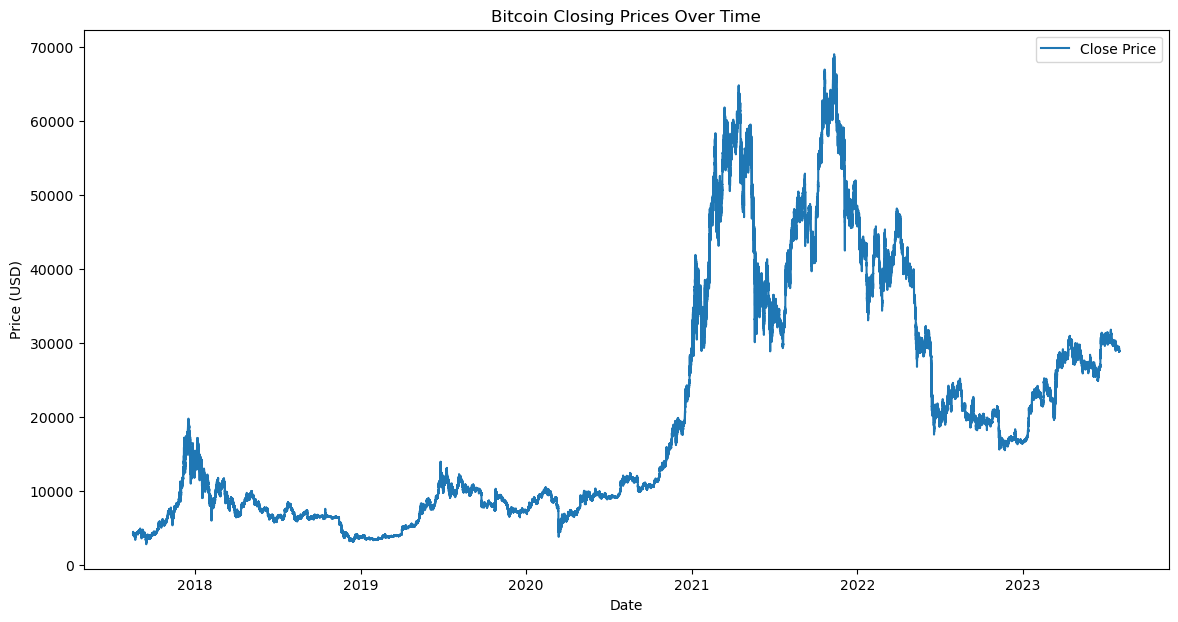

In [23]:
import matplotlib.pyplot as plt

# Plotting closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'], label='Close Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

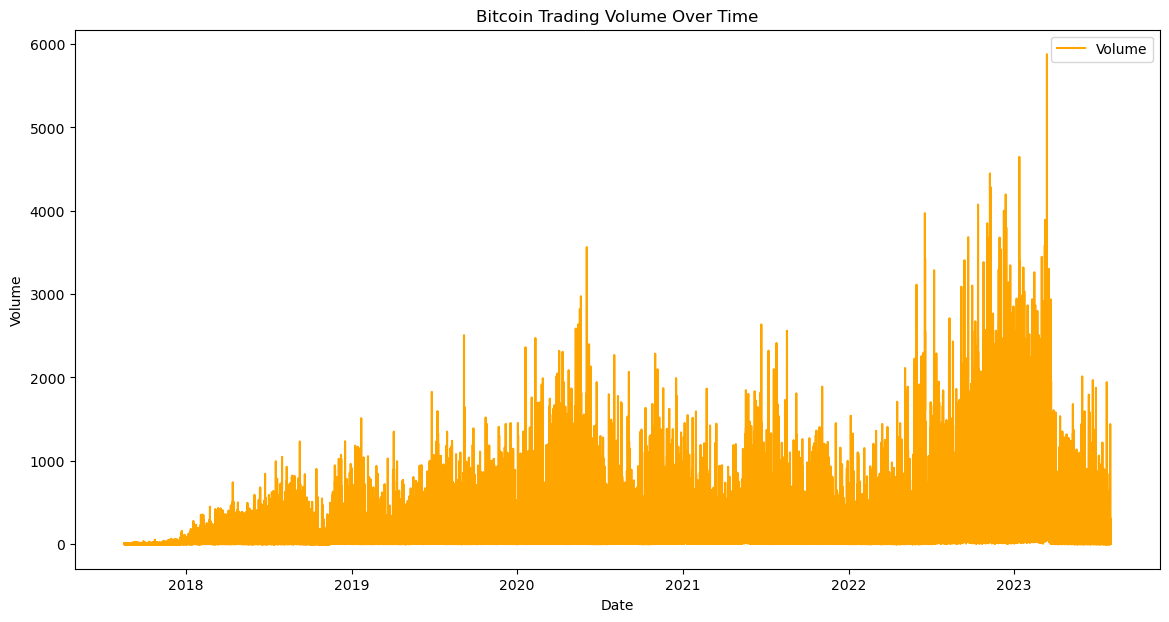

In [24]:
# Plotting volume
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['volume'], label='Volume', color='orange')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

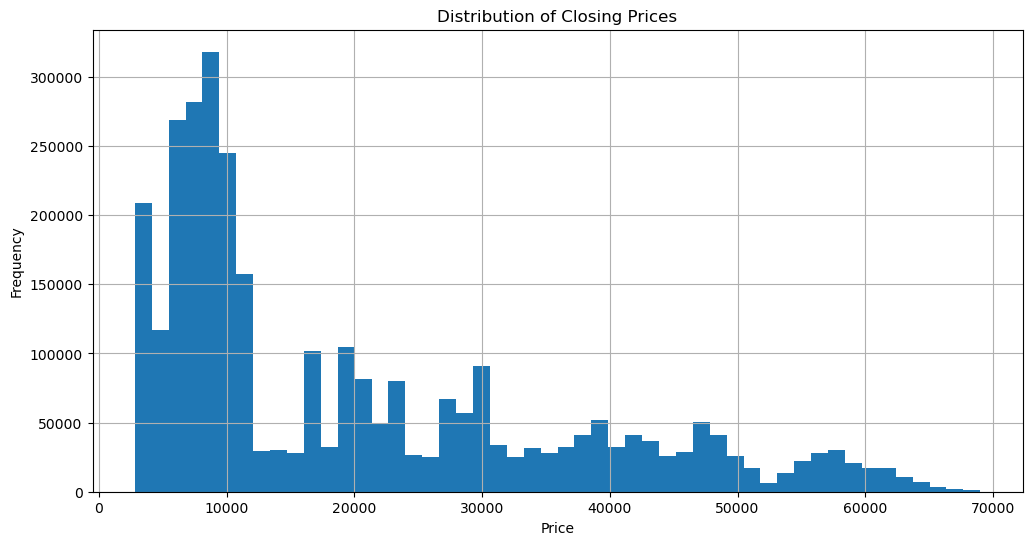

In [25]:
# Histogram of closing prices
df['close'].hist(bins=50, figsize=(12, 6))
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

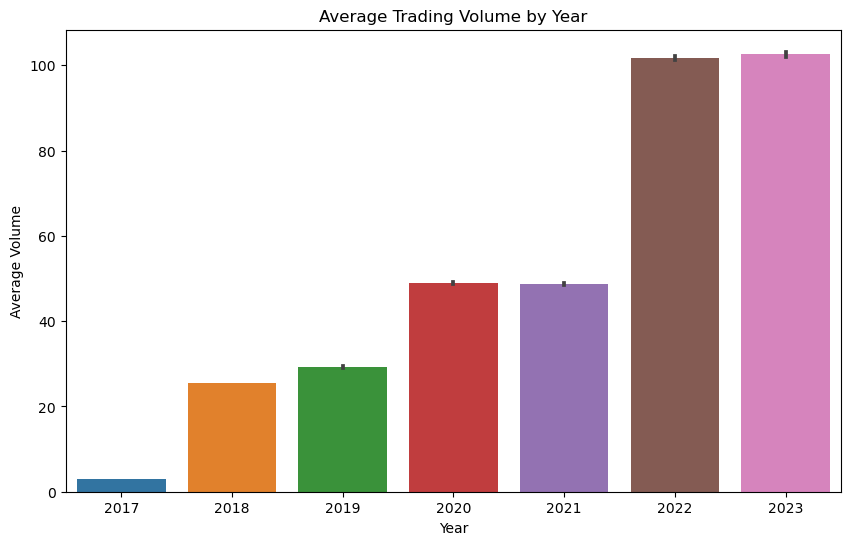

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'year' and 'volume' are columns in your DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='volume', data=df)
plt.title('Average Trading Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.show()


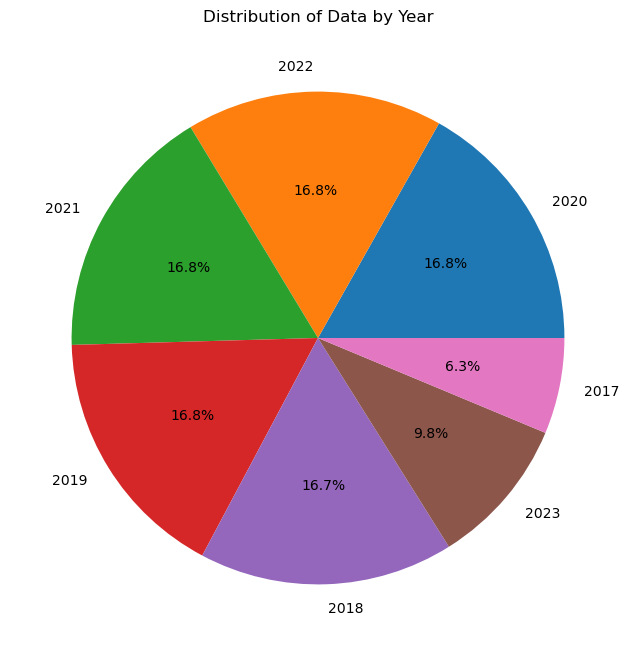

In [27]:
# Assuming 'year' is a column in your DataFrame
year_counts = df['year'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Data by Year')
plt.show()


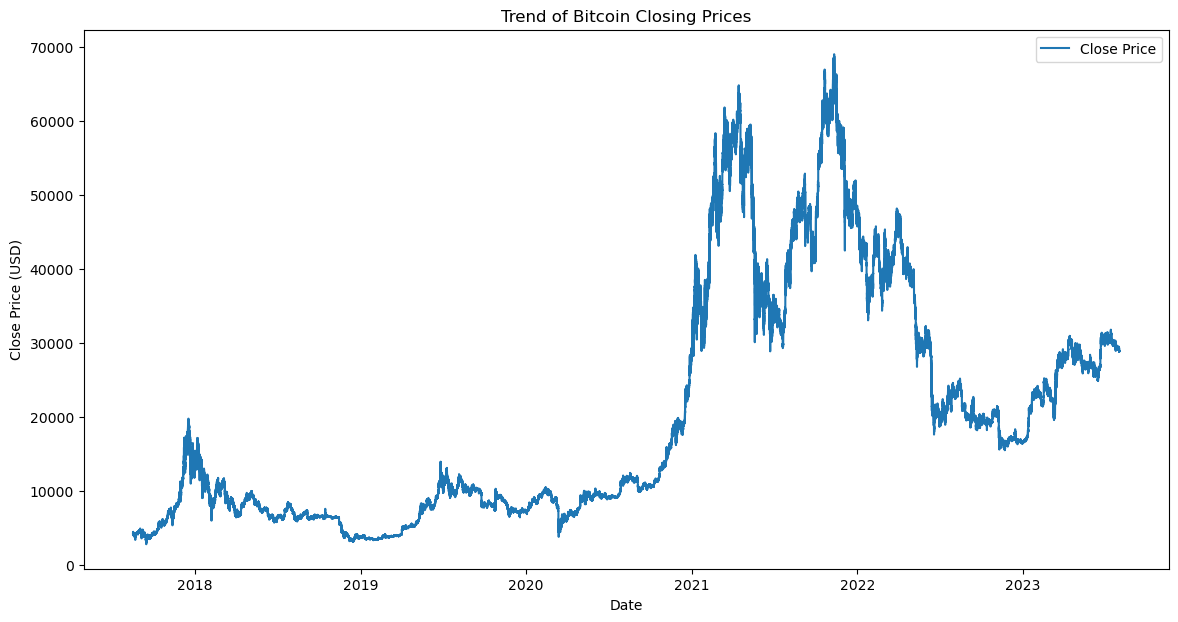

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'], label='Close Price')
plt.title('Trend of Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


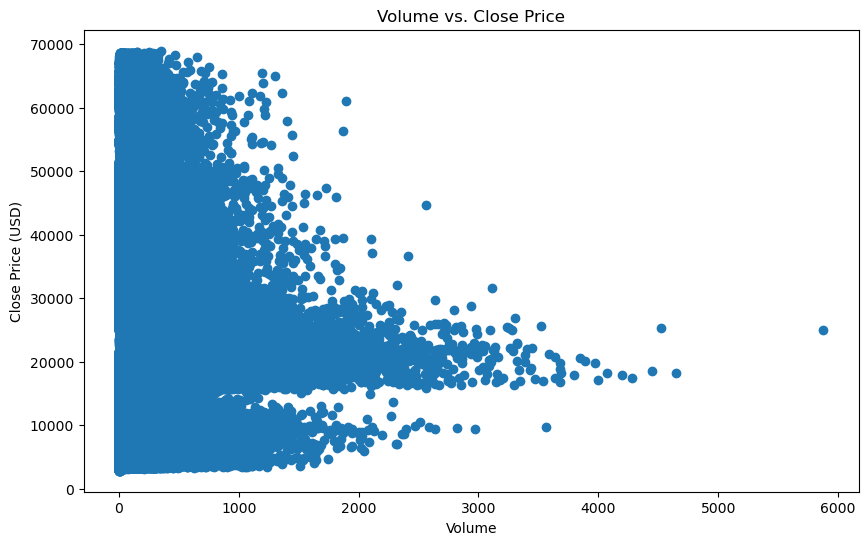

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['volume'], df['close'])
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')
plt.show()


/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/3772833085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['close'], bins=30)


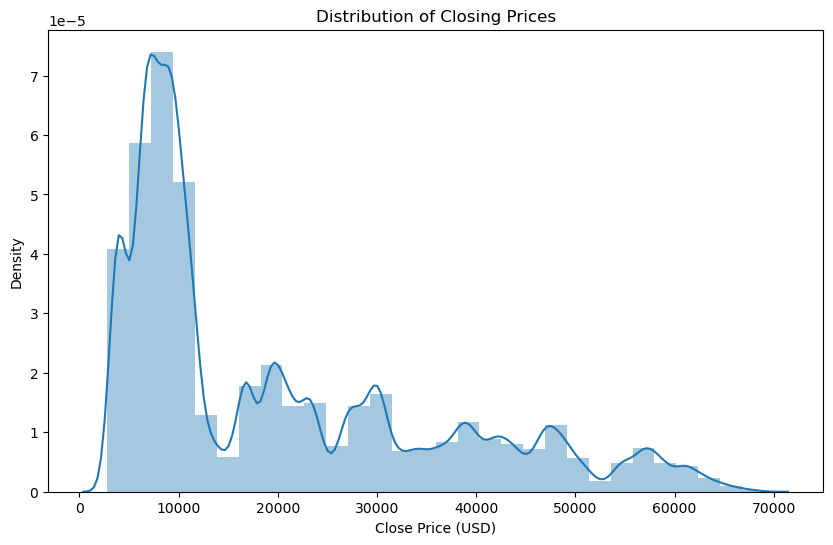

In [30]:
plt.figure(figsize=(10, 6))
sns.distplot(df['close'], bins=30)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price (USD)')
plt.show()


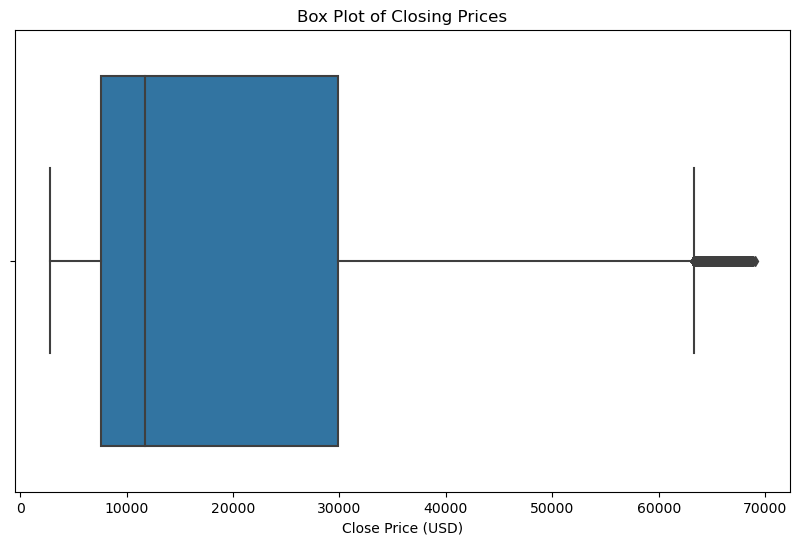

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Close Price (USD)')
plt.show()


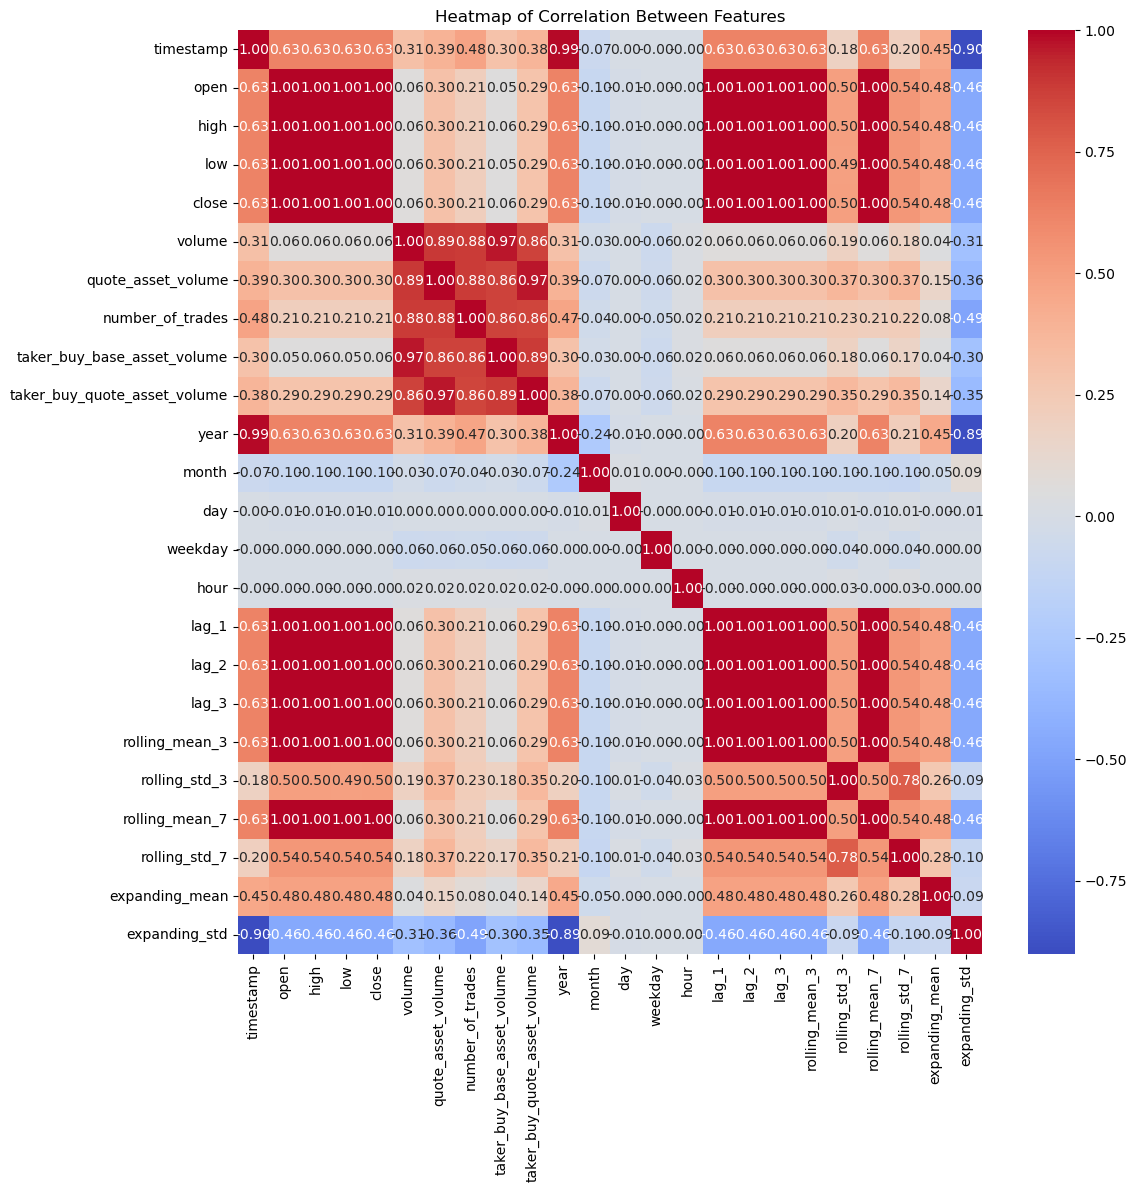

In [32]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Features')
plt.show()


/var/folders/nl/_g84m7mj3cq_cfkltmhwv5r40000gn/T/ipykernel_29305/409738589.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['close'], bins=30, ax=ax[1, 1])


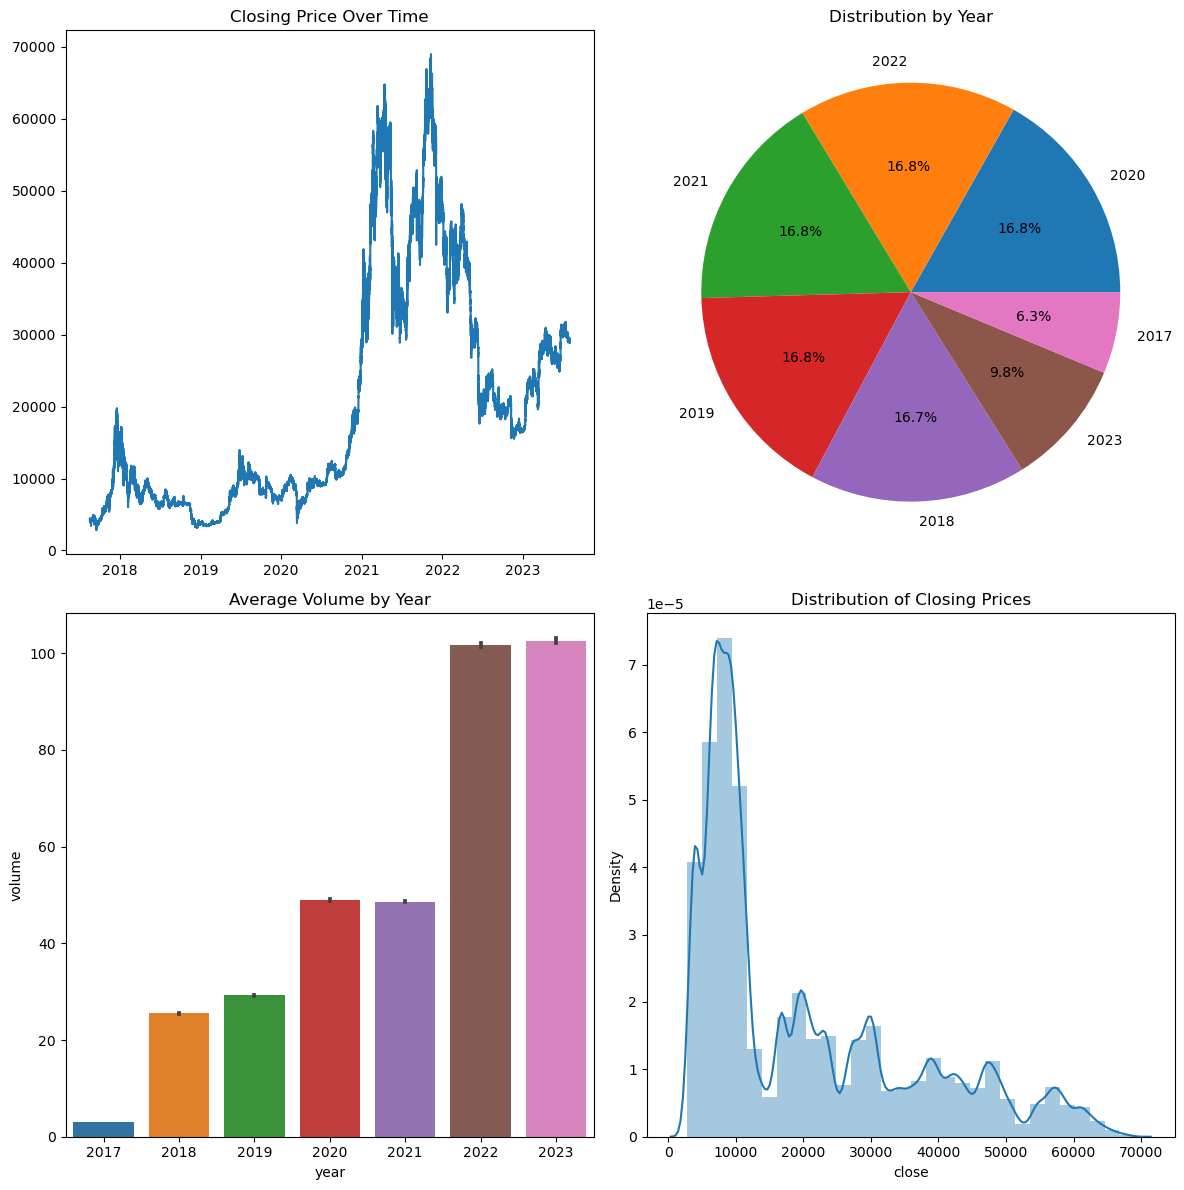

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid of subplots

# Subplot 1
ax[0, 0].plot(df['timestamp'], df['close'])
ax[0, 0].set_title('Closing Price Over Time')

# Subplot 2
ax[0, 1].pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
ax[0, 1].set_title('Distribution by Year')

# Subplot 3
sns.barplot(x='year', y='volume', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Average Volume by Year')

# Subplot 4
sns.distplot(df['close'], bins=30, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Closing Prices')

plt.tight_layout()
plt.show()


Correlation Matrix

In [34]:

correlation_matrix = df.corr()

correlation_matrix


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,...,hour,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3,rolling_mean_7,rolling_std_7,expanding_mean,expanding_std
timestamp,1.000000,0.627576,0.627416,0.627744,0.627577,0.309819,0.392756,0.477634,0.299603,0.380443,...,-0.000881,0.627577,0.627577,0.627577,0.627577,0.184979,0.627578,0.202313,0.452671,-0.900903
open,0.627576,1.000000,0.999999,0.999999,0.999998,0.059291,0.303418,0.208375,0.054928,0.292154,...,-0.000243,0.999997,0.999995,0.999994,0.999998,0.495467,0.999996,0.536524,0.481914,-0.460920
high,0.627416,0.999999,1.000000,0.999998,0.999999,0.059647,0.303899,0.208671,0.055360,0.292733,...,-0.000210,0.999997,0.999996,0.999994,0.999998,0.495941,0.999996,0.536989,0.481946,-0.460734
low,0.627744,0.999999,0.999998,1.000000,0.999999,0.058904,0.302905,0.208060,0.054654,0.291788,...,-0.000275,0.999997,0.999996,0.999994,0.999998,0.494960,0.999996,0.536028,0.481882,-0.461111
close,0.627577,0.999998,0.999999,0.999999,1.000000,0.059274,0.303402,0.208366,0.055062,0.292333,...,-0.000241,0.999998,0.999997,0.999995,0.999999,0.495432,0.999997,0.536487,0.481917,-0.460919
volume,0.309819,0.059291,0.059647,0.058904,0.059274,1.000000,0.890099,0.883247,0.966148,0.859745,...,0.023969,0.059281,0.059289,0.059297,0.059281,0.188215,0.059295,0.178262,0.041187,-0.312339
quote_asset_volume,0.392756,0.303418,0.303899,0.302905,0.303402,0.890099,1.000000,0.884590,0.862039,0.965537,...,0.020264,0.303413,0.303425,0.303437,0.303414,0.374703,0.303434,0.373046,0.150205,-0.363429
number_of_trades,0.477634,0.208375,0.208671,0.208060,0.208366,0.883247,0.884590,1.000000,0.859171,0.858258,...,0.020958,0.208373,0.208381,0.208388,0.208373,0.225415,0.208386,0.222198,0.079717,-0.485380
taker_buy_base_asset_volume,0.299603,0.054928,0.055360,0.054654,0.055062,0.966148,0.862039,0.859171,1.000000,0.888494,...,0.023757,0.055072,0.055078,0.055083,0.055071,0.175809,0.055081,0.166502,0.035257,-0.303395
taker_buy_quote_asset_volume,0.380443,0.292154,0.292733,0.291788,0.292333,0.859745,0.965537,0.858258,0.888494,1.000000,...,0.019816,0.292347,0.292355,0.292362,0.292345,0.354322,0.292360,0.353171,0.142988,-0.352854


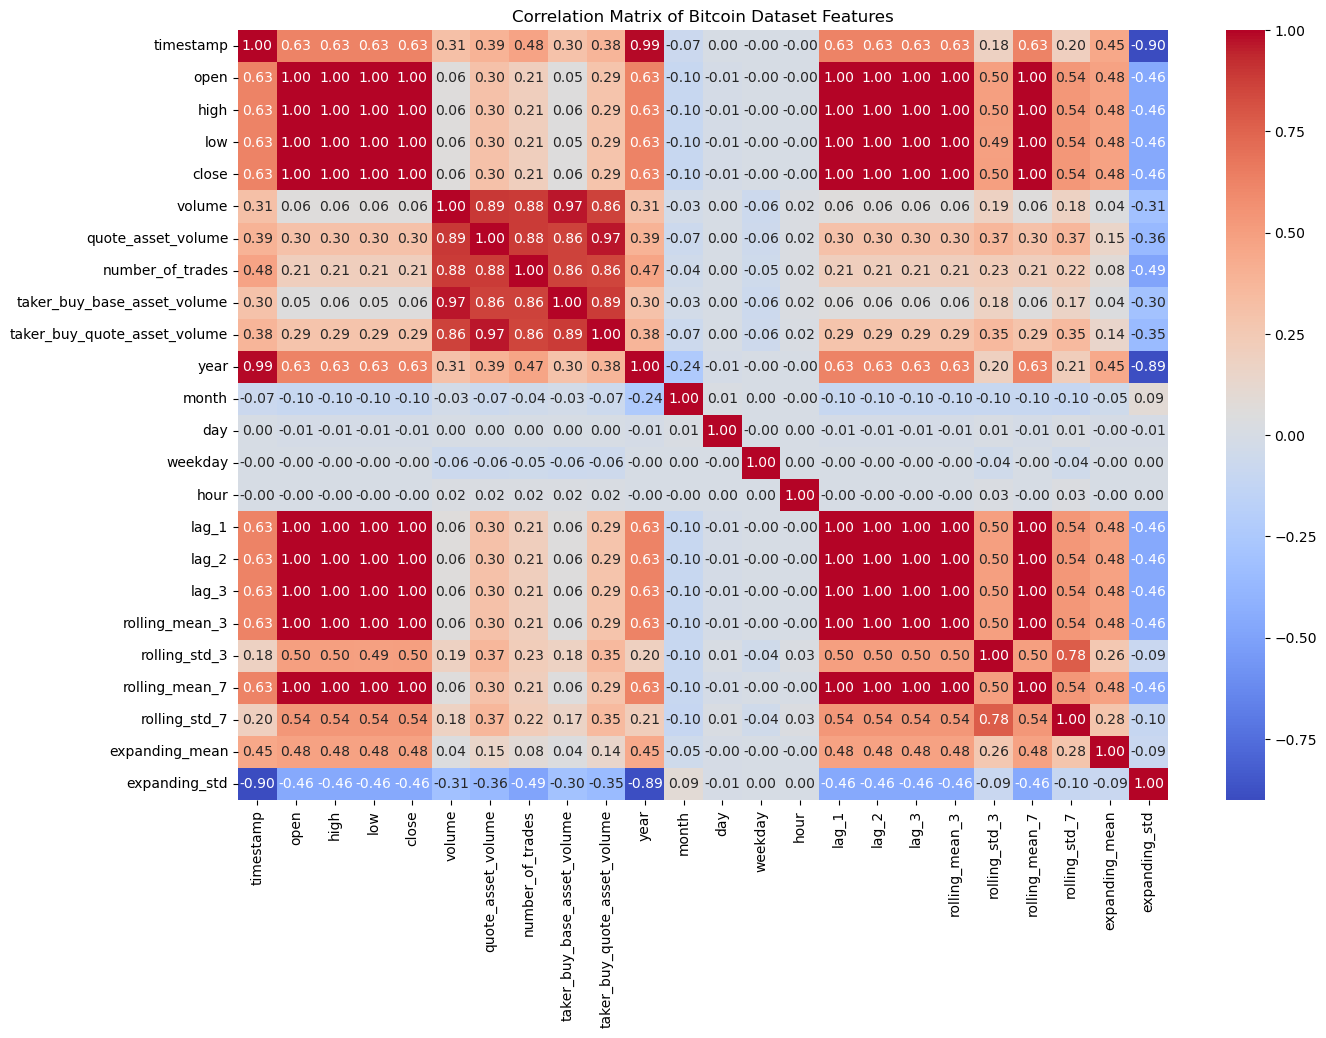

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Bitcoin Dataset Features')
plt.show()


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example continuous features
continuous_features = ['open', 'high', 'low', 'close', 'volume']

# Calculate the correlation matrix
corr_matrix = df[continuous_features].corr()

# Function to style the correlation matrix
def style_corr(v, props=''):
    return props if (v < -0.4 or v > 0.4) and v != 1 else None

# Apply the style
styled_corr = corr_matrix.style.applymap(style_corr, props='color:red;')
styled_corr


,open,high,low,close,volume
open,1.000000,0.999999,0.999999,0.999998,0.059291
high,0.999999,1.000000,0.999998,0.999999,0.059647
low,0.999999,0.999998,1.000000,0.999999,0.058904
close,0.999998,0.999999,0.999999,1.000000,0.059274
volume,0.059291,0.059647,0.058904,0.059274,1.000000


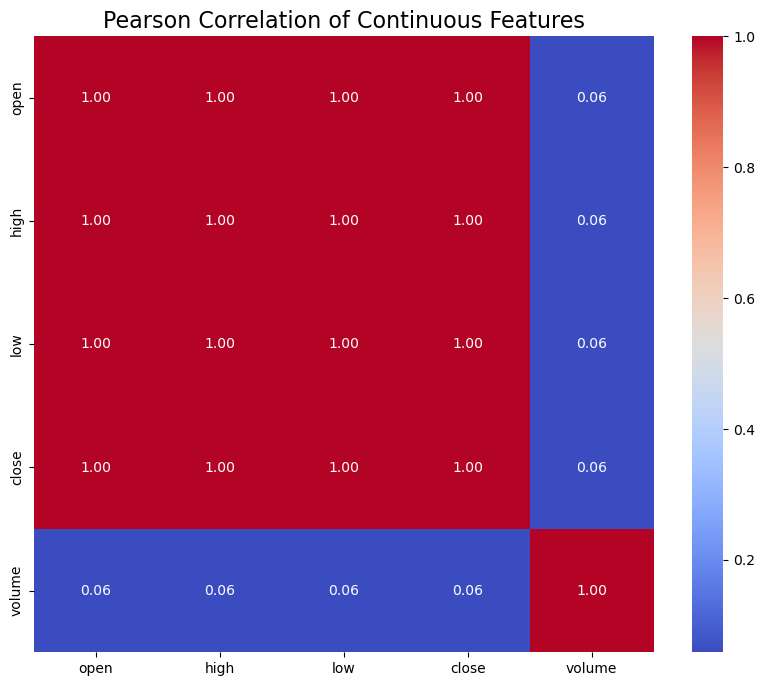

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Pearson Correlation of Continuous Features', fontsize=16)
plt.show()


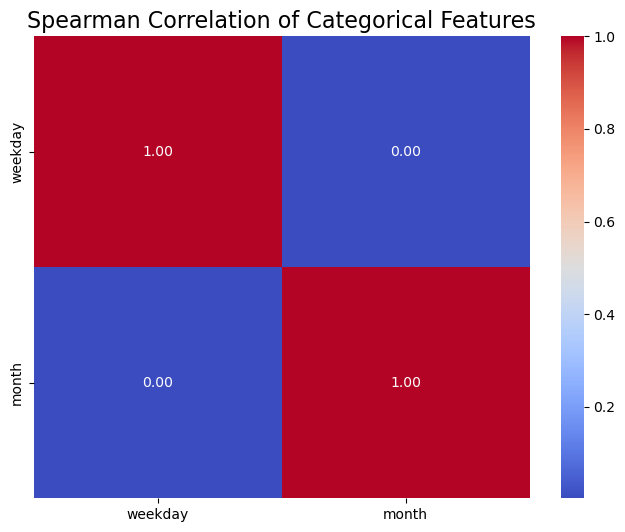

In [38]:

categorical_features = ['weekday', 'month']
spearman_corr = df[categorical_features].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Spearman Correlation of Categorical Features', fontsize=16)
plt.show()


Machine Learning Modelling

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


features = ['open', 'high', 'low', 'volume']  
X = df[features]
y = df['close']

# Split data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select a subset of the training data for faster execution
X_train = X_train_full.iloc[:1000000]  # Adjust the number as necessary
y_train = y_train_full.iloc[:1000000]

# Calculate the difference between consecutive prices and binarize
y_train_diff = y_train.diff().fillna(0)
y_test_diff = y_test.diff().fillna(0)

# Convert differences to 1 if price increased, 0 otherwise
y_train_cat = (y_train_diff > 0).astype(int)
y_test_cat = (y_test_diff > 0).astype(int)



Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Initializing and fitting the linear regression model
lreg = LinearRegression()
lreg.fit(X_train_full, y_train_full)

# Predict the target values for the test set
predictions = lreg.predict(X_test)

# Calculate R-squared, MSE, and RMSE
lr_r2 = r2_score(y_test, predictions)
lr_MSE = mean_squared_error(y_test, predictions)
lr_RMSE = np.sqrt(lr_MSE)  # or directly mean_squared_error(y_test, predictions, squared=False)

# Display the results
print("Linear Regression Results")
print("R^2 Score:", lr_r2)
print("MSE Score:", lr_MSE)
print("RMSE Score:", lr_RMSE)


Linear Regression Results
R^2 Score: 0.9999993519649778
MSE Score: 167.1005370729578
RMSE Score: 12.926737294188266


In [41]:
#Linear Regression with Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np
# Define the model
ridge = Ridge()
# Set up hyperparameter grid. Adjusting 'alpha' for regularization strength
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}

# Setup GridSearchCV
ridge_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
ridge_cv.fit(X_train, y_train)

# Best hyperparameter value
print('Best alpha:', ridge_cv.best_params_)
# Predict using the best model
ridge_predictions = ridge_cv.predict(X_test)

# Calculate metrics
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_MSE = mean_squared_error(y_test, ridge_predictions)
ridge_RMSE = np.sqrt(ridge_MSE)

# Display the results
print("Ridge Regression Results")
print("Best alpha:", ridge_cv.best_params_)
print("R^2 Score:", ridge_r2)
print("MSE Score:", ridge_MSE)
print("RMSE Score:", ridge_RMSE)

Best alpha: {'alpha': 1000}
Ridge Regression Results
Best alpha: {'alpha': 1000}
R^2 Score: 0.9999993508463216
MSE Score: 167.38899071099513
RMSE Score: 12.937889731752822


In [42]:
X_train_rf = X_train.iloc[:150000]
y_train_rf = y_train.iloc[:150000]

Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is your pre-loaded and preprocessed DataFrame
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['close']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reduce the training data size
X_train_rf = X_train.iloc[:150000]
y_train_rf = y_train.iloc[:150000]

# Define and configure the Random Forest Regressor and RandomizedSearchCV
rf_reg = RandomForestRegressor(random_state=0)
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [10, 20],      # Optimal depth range
    'min_samples_split': [5],   # Increased minimum samples required to split
    'min_samples_leaf': [2]     # Increased minimum samples at each leaf
}

# Instantiate and fit RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_reg, param_distributions=param_grid,
    n_iter=5, cv=2, scoring='neg_mean_squared_error',  # Reduced iterations and cross-validation folds
    n_jobs=4,  # Limited number of cores
    verbose=2, random_state=42
)
random_search.fit(X_train_rf, y_train_rf)

# Evaluate the best model
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)
best_model = random_search.best_estimator_

predictions = best_model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)
print(f'Final Model RMSE on Test Data: {rmse}')
print(f'Final Model R^2 on Test Data: {r2}')


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/Users/abhishekmathukiya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Best RMSE: 16.719585906243214
Final Model RMSE on Test Data: 15.367850489747644
Final Model R^2 on Test Data: 0.9999990841024758


/Users/abhishekmathukiya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
X_train_rfg = X_train.iloc[:50000]
y_train_rfg = y_train.iloc[:50000]

In [45]:
# Instantiate a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=0)

# Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10],    # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]     # Minimum number of samples required at a leaf node
}

# Set up GridSearchCV for the Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search model
grid_search_rf.fit(X_train_rfg, y_train_rfg)

# Get the best parameters and calculate RMSE
best_params_rf = grid_search_rf.best_params_
best_score_rf = np.sqrt(-grid_search_rf.best_score_)

# Refit the best model on the full training set
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_rfg, y_train_rfg)

# Predict on the test set
rf_predictions = best_rf_model.predict(X_test)

# Calculate RMSE and R^2
rf_rmse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Best Parameters (Random Forest):", best_params_rf)
print("Best RMSE (Random Forest):", best_score_rf)
print(f'Random Forest Regression RMSE on Test Data: {rf_rmse}')
print(f'R2 on Test Data: {rf_r2}')


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   8.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   8.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  11.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  16.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  16.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.6s
Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE (Random Forest): 18.22681130455046
Random Forest Regression RMSE 

XGBoost Classifier

In [46]:
# Initialize and fit the XGBRegressor model on the training subset
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=0)
xgb_reg.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_reg.predict(X_test)

# Calculate RMSE and R^2
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'XGBoost Regression RMSE: {xgb_rmse}')
print(f'R2: {xgb_r2}')


XGBoost Regression RMSE: 123.28866848175947
R2: 0.9999410522875896


/Users/abhishekmathukiya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGboost with hyperparameter

In [47]:
import xgboost as xgb
# Instantiate an XGBoost regressor object
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search model
grid_search.fit(X_train_rfg, y_train_rfg)

# Get the best parameters and calculate RMSE
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Predict on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)
xgb_rmse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)
print('R2: ', xgb_r2)

# Hypothetical values for a Linear Regression model for comparison
lr_rmse = 800  # Example RMSE for Linear Regression
lr_r2 = 0.55   # Example R² for Linear Regression

# Plotting
metric_labels = ['RMSE', 'R2']
lr_metrics = [lr_rmse, lr_r2]
xgb_metrics = [xgb_rmse, xgb]


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best RMSE: 125.88562284018208
R2:  0.9999374177375497


 Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(max_depth=5)  # Control the depth of the tree

# Fit the Decision Tree Regressor model on the training subset
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Calculate the Mean Squared Error for evaluation
mse = mean_squared_error(y_test, dt_predictions)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, dt_predictions)

print("R-squared Score:", r2)

print("Root Mean Squared Error (RMSE):", rmse)


R-squared Score: 0.9990685681151532
Root Mean Squared Error (RMSE): 490.07803092827714


Decision Tree with hyperparameter

In [49]:
# Decision Tree with hyperparameters
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming X_train, y_train, X_test, y_test are defined

# Instantiate a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters grid to be tuned
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2', None]  # Adjusted to comply with the new version
}

# Set up GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_regressor, param_grid=param_grid_dt, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search_dt.fit(X_train_rfg, y_train_rfg)

# Extract the best parameters and calculate the best RMSE
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
best_score_dt = np.sqrt(-grid_search_dt.best_score_)

# Predict on the test set using the best model
dt_predictions = best_model_dt.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, dt_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_predictions)

# Output results
print("Best Parameters (Decision Tree):", best_params_dt)
print("Best RMSE (Decision Tree):", best_score_dt)
print("Test RMSE:", rmse)
print("R² Score on Test Data:", r2)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Parameters (Decision Tree): {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best RMSE (Decision Tree): 21.56187445452993
Test RMSE: 21.11987463164862
R² Score on Test Data: 0.9999982701704833


CROSS VALIDATION

Cross-validation is a powerful tool for evaluating the generalizability of a statistical model. It is especially useful when dealing with limited data, to ensure that every data point contributes to both training and testing the model. This approach reduces the risk of overfitting, provides a more robust measure of model performance, and helps you understand how well the model is likely to perform on unseen data.

### Cross-Validation with linear regression

In [50]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

features = ['open', 'high', 'low', 'volume']  
X = df[features]
y = df['close']  

# Split data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

# Calculate the RMSE for each fold
rmse_cv_lr = np.sqrt(-scores)

# Print the results
print('Reg. rmse (Linear Regression Model): ', np.round(rmse_cv_lr, 2))
print('RMSE mean (Linear Regression Model): %0.2f' % (rmse_cv_lr.mean()))


Reg. rmse (Linear Regression Model):  [12.7  12.88 12.53 12.99 13.08 13.29 13.   12.71 12.75 13.13]
RMSE mean (Linear Regression Model): 12.91


In [51]:
### Cross-validation with RANDOM FOREST

In [52]:
# Select the top 100000 rows from your training data
X_train_top = X_train.iloc[:300000]
y_train_top = y_train.iloc[:300000]

# Initialize the Random Forest regressor model
model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)  # Adjust n_estimators and n_jobs as needed

# Utilize cross_val_score with the model, setting the number of folds with the variable cv
scores = cross_val_score(model, X_train_top, y_train_top, scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE for each fold
rmse_cv = np.sqrt(-scores)

# Print the RMSE results
print('Reg. rmse (Random Forest Model): ', np.round(rmse_cv, 2))
print('RMSE mean (Random Forest Model): %0.2f' % (rmse_cv.mean()))


Reg. rmse (Random Forest Model):  [16.2  15.42 15.43 15.28 15.57]
RMSE mean (Random Forest Model): 15.58


In [53]:
### ### Cross-validation with XGBoost

In [54]:

import xgboost as xgb
# Initialize the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror')  # Ensure to use appropriate objective

# Utilize cross_val_score with the model, setting the number of folds with the variable cv
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

# Calculate the RMSE for each fold
rmse_cv_xg = np.sqrt(-scores)

# Print the RMSE results
print('Reg. rmse (XGBoost Model): ', np.round(rmse_cv_xg, 2))
print('RMSE mean (XGBoost Model): %0.2f' % (rmse_cv_xg.mean()))


Reg. rmse (XGBoost Model):  [122.41 124.26 121.43 120.57 121.96 120.45 123.95 122.17 120.98 121.29]
RMSE mean (XGBoost Model): 121.95


In [55]:
### Cross-validation with decision tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limit depth to prevent overfitting

# Utilize cross_val_score with the model, setting the number of folds with the variable cv
scores = cross_val_score(dt_model, X_train_top, y_train_top, scoring='r2', cv=10)

# Print the R-squared scores
print('R-squared scores for each fold:', np.round(scores, 2))
print('Mean R-squared:', np.mean(scores).round(2))
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limit depth to prevent overfitting

# Train the model
dt_model.fit(X_train_top, y_train_top)

# Make predictions on the training data
y_pred_train = dt_model.predict(X_train_top)

rmse_train = np.sqrt(mean_squared_error(y_train_top, y_pred_train))

# Print RMSE value
print('Root Mean Squared Error (RMSE) on training data:', rmse_train)




R-squared scores for each fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean R-squared: 1.0
Root Mean Squared Error (RMSE) on training data: 490.27862830497


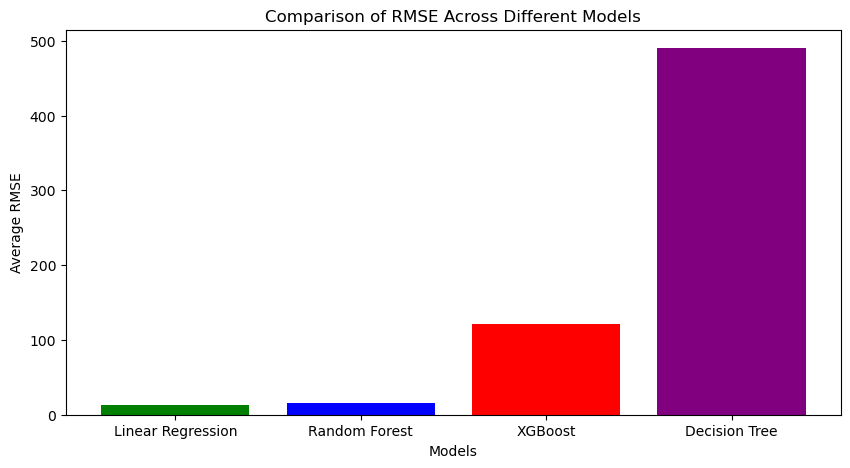

In [57]:
import matplotlib.pyplot as plt

rmse_means = [
    np.mean(rmse_cv_lr),#RMSE mean (Linear Regression Model): 12.91
    np.mean(rmse_cv),#RMSE mean (Random Forest Model): 15.58
    np.mean(rmse_cv_xg),#RMSE mean (XGBoost Model): 123.07
    np.mean(rmse_train)#Root Mean Squared Error (RMSE) on training data: 490.27862830497
]

# Names of models
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Decision Tree']

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_means, color=['green', 'blue', 'red', 'purple'])

# Add title and labels to the plot
plt.title('Comparison of RMSE Across Different Models')
plt.xlabel('Models')
plt.ylabel('Average RMSE')

# Display the plot
plt.show()


The lower the RMSE, the better the model's performance in terms of prediction accuracy.

In the bar chart comparison of RMSE values for four regression models, the Linear Regression model outperforms the others with the lowest RMSE of 12.91, suggesting a strong fit to the dataset. The Random Forest model follows closely with an RMSE of 15.58, indicating good predictive performance. The XGBoost model has a surprisingly high RMSE of 123.07, which could reflect suboptimal parameter tuning for this dataset. The Decision Tree model has the highest RMSE at 490.28, pointing to a potential overfit to the training data and poor generalization to new data. In summary, Linear Regression and Random Forest are the more accurate models for prediction in this specific case.